

# **Análisis Exploratorio de Datos (EDA) para el Dataset Checkin**

El Análisis Exploratorio de Datos (EDA) es el proceso de explorar y comprender los datos antes de realizar análisis más avanzados. En este Jupyter notebook, realizaremos un EDA para los conjuntos de datos relacionados con Yelp, con el objetivo de identificar problemas potenciales y comprender mejor la estructura de los datos. A continuación se describen los pasos que seguiremos:

---

### **1. Exploración Inicial**
- **1.1. Carga del Archivo**: Cargaremos cada archivo en un DataFrame de pandas.
- **1.2. Dimensiones del DataFrame**: Determinaremos cuántas filas y columnas tiene cada DataFrame.
- **1.3. Tipos de Datos**: Revisaremos los tipos de datos para cada columna.
- **1.4. Muestra Rápida**: Observaremos las primeras y últimas filas para tener una idea general del contenido del DataFrame.



### **2. Análisis de Datos Cualitativos**
- **2.1. Valores Nulos**: Identificaremos columnas con valores faltantes y cuántos valores nulos hay.
- **2.2. Estadísticas Básicas**: Utilizaremos `describe()` para obtener estadísticas como media, mediana, desviación estándar, etc.
- **2.3. Valores Únicos**: Contaremos cuántos valores únicos hay en cada columna para entender su diversidad.



### **3. Análisis de Datos Cuantitativos**
- **3.1. Distribuciones**: Crearemos histogramas para visualizar la distribución de las columnas numéricas.
- **3.2. Correlaciones**: Analizaremos las correlaciones entre columnas numéricas para encontrar relaciones significativas.
- **3.3. Detección de Outliers**: Usaremos gráficos como boxplots para detectar valores atípicos.



### **4. Análisis de Datos Categóricos**
- **4.1. Distribución de Categorías**: Verificaremos la frecuencia de las categorías para entender su diversidad.
- **4.2. Relaciones entre Categorías**: Usaremos gráficos de barras para ver cómo se relacionan las categorías con otras variables.



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.

---

Al final de este EDA, esperamos tener una comprensión clara de nuestros datos, permitiéndonos planificar y ejecutar análisis más avanzados. Este proceso establecerá una base sólida para el resto del proyecto y asegurará que estamos trabajando con datos limpios y consistentes.

---


**IMPORTAMOS LIBRERIAS**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Exploración Inicial**

In [7]:
#Ruta del archivo Parquet
ruta_checkin_parquet = '../../Yelp/raw_data_parquet/checkin.parquet'


# Cargar el archivo Parquet en un DataFrame
df_checkin = pd.read_parquet(ruta_checkin_parquet)

In [8]:
# Dimensiones
print("Dimensiones:", df_checkin.shape)

Dimensiones: (131930, 2)


Por algun motivo al momento de cargar el archivo business.pkl las columnas se estan duplicando.. Así que vamos a chequear duplicidad en las columnas 

In [9]:
# Mostrar todas las columnas para verificar duplicados
print("Columnas del DataFrame:", df_checkin.columns)

# Identificar columnas duplicadas
columnas_duplicadas = df_checkin.columns[df_checkin.columns.duplicated()].unique()

print("Columnas duplicadas:", columnas_duplicadas)

Columnas del DataFrame: Index(['business_id', 'date'], dtype='object')
Columnas duplicadas: Index([], dtype='object')


In [10]:
# Eliminar columnas duplicadas (manteniendo solo la primera aparición)
checkin_unique = df_checkin.loc[:, ~df_checkin.columns.duplicated()]

# Reasignar el DataFrame para mayor claridad
df_checkin= checkin_unique

# Verificar las columnas únicas
print("Columnas después de eliminar duplicados:", df_checkin.columns)


Columnas después de eliminar duplicados: Index(['business_id', 'date'], dtype='object')


In [11]:
# Vista Previa

# Dimensiones
print("Dimensiones:", df_checkin.shape)

df_checkin.head(3)



Dimensiones: (131930, 2)


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


Tomamos una muestra aleatoria para optimizar tiempos de procesamiento

In [12]:
# Tomar una muestra aleatoria del DataFrame
checkin_sample = df_checkin.sample(frac=0.1, random_state=42)  # 10% del DataFrame

# Dimensiones de la muestra
print("Dimensiones de la muestra:", checkin_sample.shape)

Dimensiones de la muestra: (13193, 2)


In [13]:
checkin_sample['date'] = checkin_sample['date'].str.split(', ')

# Convertir cada fecha y hora en un objeto de fecha y hora
checkin_sample['date'] = checkin_sample['date'].apply(lambda x: [pd.to_datetime(date_str) for date_str in x])       # Processing Time 8m 33s 

# Mostrar el DataFrame actualizado
print(checkin_sample)

                   business_id  \
40660   IjAjccegjWKQPu41iuMpZQ   
43010   JrYWF3BWf1GYk8hnF2Cz4w   
95361   iKjXWDjdv9N7fT6kgGKM6g   
94163   hkuIjzyewr7RyIbKvjUQ5A   
84056   crgS4ogZEt2rYGwYVfeK2A   
...                        ...   
64921   UYkbkXVD-wK3OhXQrNJTGg   
74151   YzVm2QUvNwZ2cXwTczvCnw   
114216  rVRy4naZXtCqfwByrhAucg   
125091  whbGFDRK_hsdJ-ce2OT9cA   
90500   fyr5ZVNG4q5aeEOkm7wp7w   

                                                     date  
40660   [2015-08-19 22:01:18, 2015-08-26 20:35:30, 201...  
43010   [2015-08-13 22:59:33, 2015-12-31 19:23:01, 201...  
95361   [2015-06-11 17:42:50, 2015-09-25 22:00:32, 201...  
94163   [2019-06-25 23:10:05, 2019-10-16 18:21:41, 201...  
84056   [2016-09-02 22:34:41, 2016-09-05 21:20:35, 201...  
...                                                   ...  
64921   [2014-12-18 17:04:37, 2015-05-15 23:20:16, 201...  
74151   [2018-11-14 14:37:48, 2018-11-16 16:06:47, 201...  
114216  [2013-06-22 19:03:46, 2013-06-29 21:36:26, 

In [14]:
# Tipos de datos
print("Tipos de datos:", checkin_sample.dtypes)

Tipos de datos: business_id    object
date           object
dtype: object


In [15]:
checkin_sample.head(3)

,business_id,date
40660,IjAjccegjWKQPu41iuMpZQ,"[2015-08-19 22:01:18, 2015-08-26 20:35:30, 201..."
43010,JrYWF3BWf1GYk8hnF2Cz4w,"[2015-08-13 22:59:33, 2015-12-31 19:23:01, 201..."
95361,iKjXWDjdv9N7fT6kgGKM6g,"[2015-06-11 17:42:50, 2015-09-25 22:00:32, 201..."


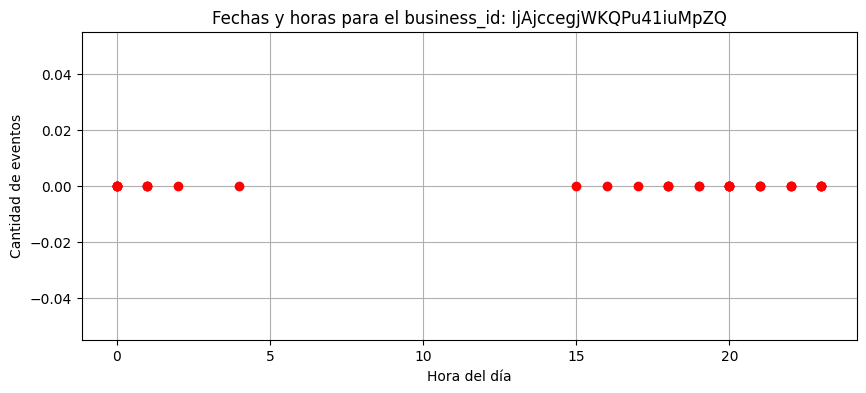

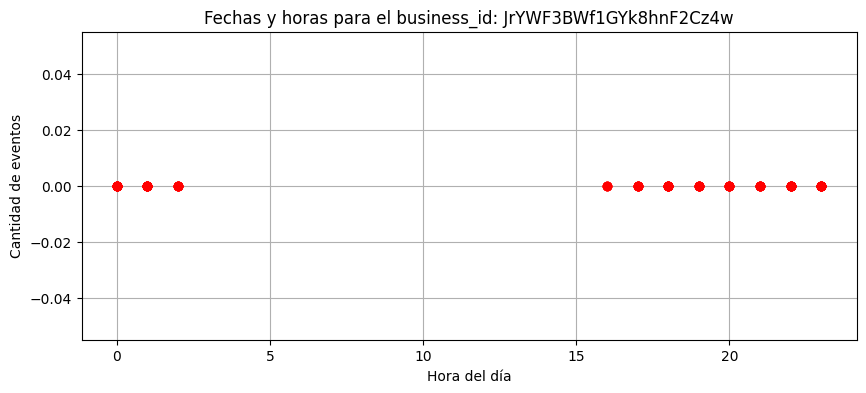

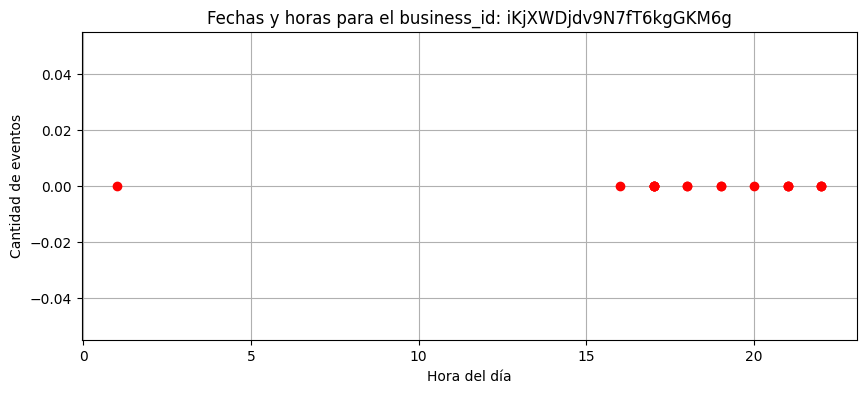

In [16]:
# Dividir cada conjunto en fechas y horas individuales
checkin_sample['date'] = checkin_sample['date'].apply(lambda x: [pd.to_datetime(date_str) for date_str in x])

# Graficar cada hora por separado en los tres primeros registros
for i, row in checkin_sample.head(3).iterrows():
    plt.figure(figsize=(10, 4))
    for date in row['date']:
        plt.plot([date.hour], [0], 'ro')  # Graficar la hora en el eje x
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de eventos')
    plt.title(f'Fechas y horas para el business_id: {row["business_id"]}')
    plt.grid(True)
    plt.show()

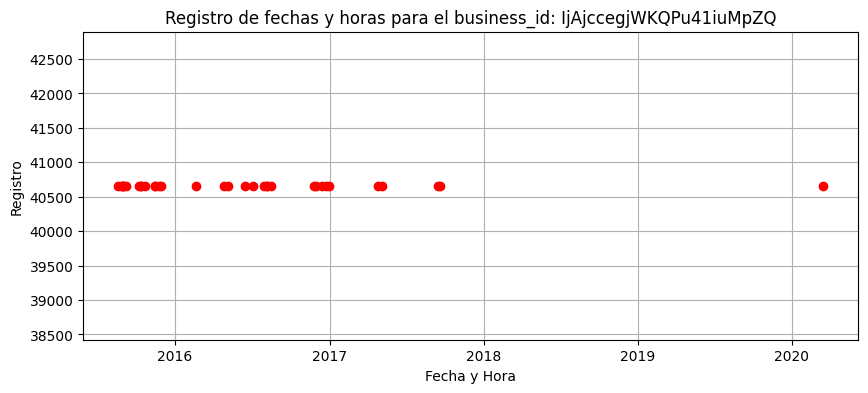

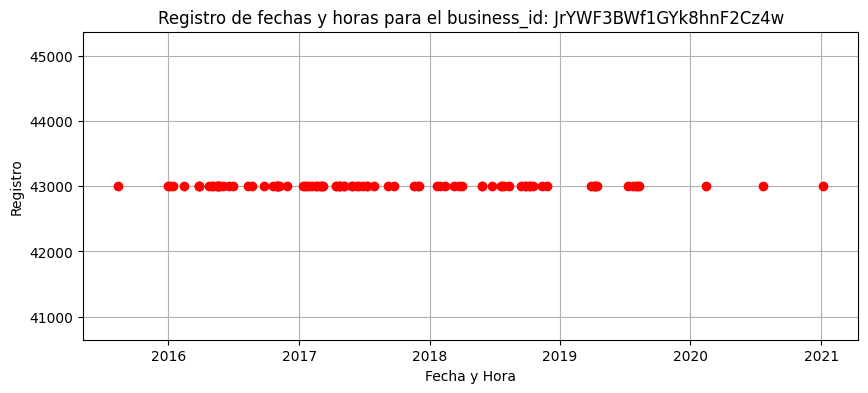

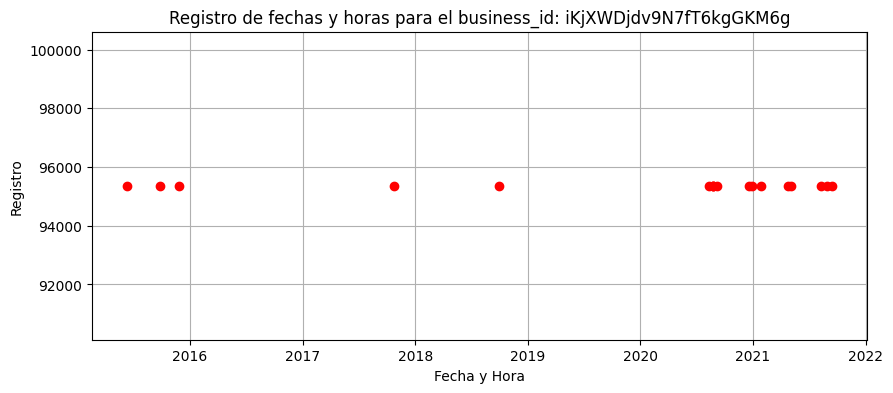

In [17]:
# Convertir cada fecha y hora en un objeto de fecha y hora
checkin_sample['date'] = checkin_sample['date'].apply(lambda x: [pd.to_datetime(date_str) for date_str in x])

# Graficar la fecha y hora para cada registro
for i, row in checkin_sample.head(3).iterrows():
    plt.figure(figsize=(10, 4))
    plt.plot(row['date'], [i] * len(row['date']), 'ro')  # Graficar la fecha y hora
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Registro')
    plt.title(f'Registro de fechas y horas para el business_id: {row["business_id"]}')
    plt.grid(True)
    plt.show()

In [18]:
# Tipos de datos
print("Tipos de datos:", checkin_sample.dtypes)

Tipos de datos: business_id    object
date           object
dtype: object


In [19]:
# Muestra las primeras filas
checkin_sample.head(3)

,business_id,date
40660,IjAjccegjWKQPu41iuMpZQ,"[2015-08-19 22:01:18, 2015-08-26 20:35:30, 201..."
43010,JrYWF3BWf1GYk8hnF2Cz4w,"[2015-08-13 22:59:33, 2015-12-31 19:23:01, 201..."
95361,iKjXWDjdv9N7fT6kgGKM6g,"[2015-06-11 17:42:50, 2015-09-25 22:00:32, 201..."


### **2. Análisis de Datos Cualitativos**

In [20]:
# Conteo de valores nulos
checkin_sample.isnull().sum()

business_id    0
date           0
dtype: int64

In [21]:
# Estadísticas básicas
checkin_sample.describe(include='all')

,business_id,date
count,13193,13193
unique,13193,13193
top,IjAjccegjWKQPu41iuMpZQ,"[2015-08-19 22:01:18, 2015-08-26 20:35:30, 201..."
freq,1,1


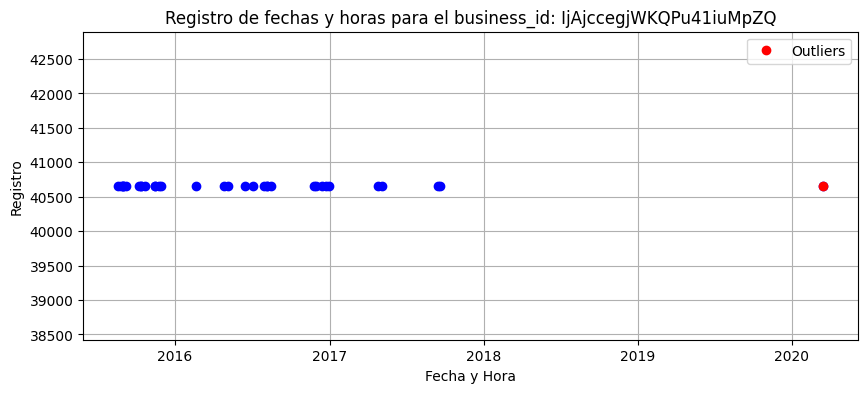

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


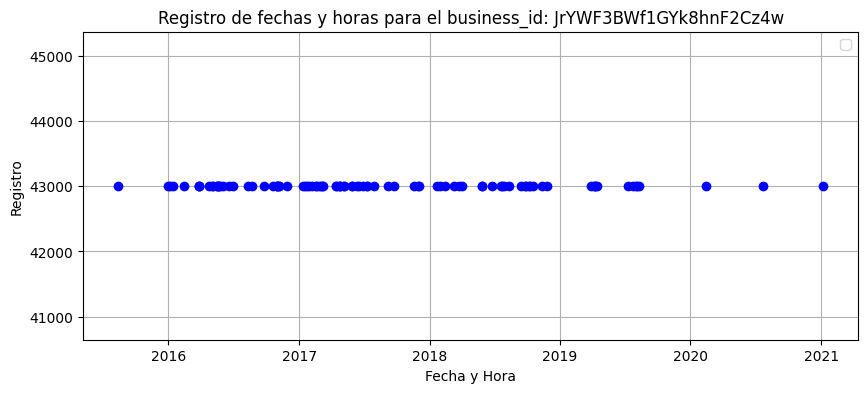

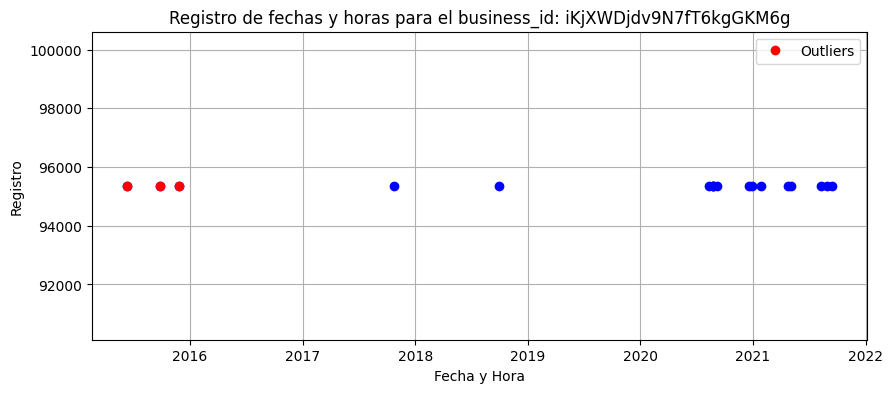

In [22]:
# Identificar outliers para cada registro basados en el rango intercuartílico (IQR)
for i, row in checkin_sample.head(3).iterrows():
    plt.figure(figsize=(10, 4))
    plt.plot(row['date'], [i] * len(row['date']), 'bo')  # Graficar todas las fechas
    dates_sorted = sorted(row['date'])
    quartile1, quartile3 = pd.Series(dates_sorted).quantile([0.25, 0.75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * iqr)
    upper_bound = quartile3 + (1.5 * iqr)
    outliers = [date for date in row['date'] if date < lower_bound or date > upper_bound]
    if outliers:
        plt.plot(outliers, [i] * len(outliers), 'ro', label='Outliers')  # Graficar outliers
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Registro')
    plt.title(f'Registro de fechas y horas para el business_id: {row["business_id"]}')
    plt.grid(True)
    plt.legend()
    plt.show()

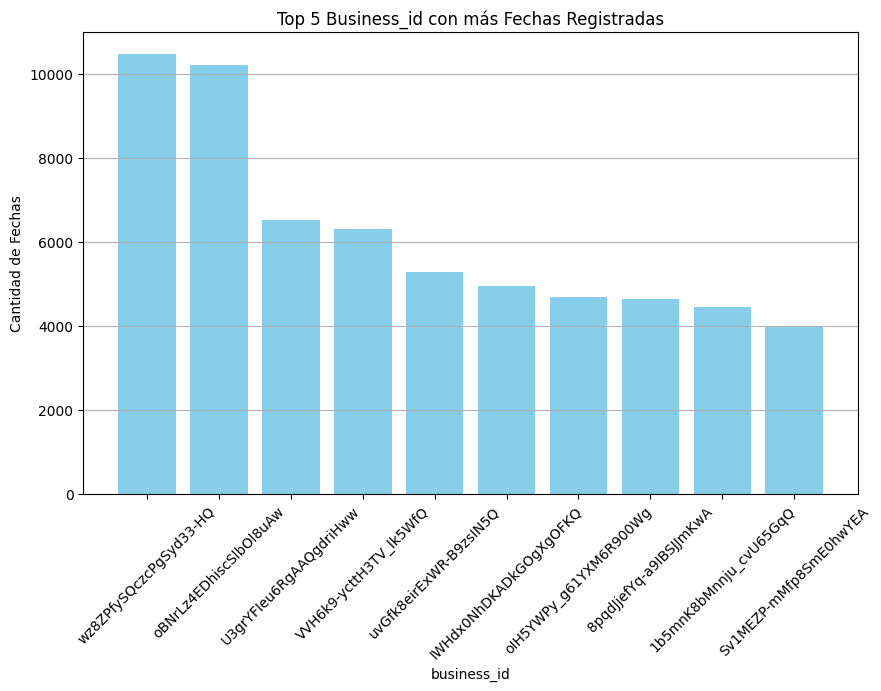

In [23]:
# Contar el número de fechas por registro
checkin_sample['date_count'] = checkin_sample['date'].apply(len)

# Ordenar el DataFrame por la cantidad de fechas en orden descendente y seleccionar los cinco primeros registros
top_5_businesses = checkin_sample.sort_values(by='date_count', ascending=False).head(10)

# Graficar el top 5 de business id con más fechas registradas
plt.figure(figsize=(10, 6))
plt.bar(top_5_businesses['business_id'], top_5_businesses['date_count'], color='skyblue')
plt.xlabel('business_id')
plt.ylabel('Cantidad de Fechas')
plt.title('Top 5 Business_id con más Fechas Registradas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### **3. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.